In [3]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install xgboost

In [6]:
!pip install lightgbm

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import numpy as np
import scipy.sparse as sparse
from scipy import sparse
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
from scipy.stats import fisher_exact
from scipy.stats import chi2_contingency
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, balanced_accuracy_score, accuracy_score

In [8]:
std_reg = pd.read_csv("std_reg.csv")
std_reg.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [9]:
std_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [10]:
std_reg.describe()

,id_student,date_registration,date_unregistration
count,3.259300e+04,32548.000000,10072.000000
mean,7.066877e+05,-69.411300,49.757645
std,5.491673e+05,49.260522,82.460890
min,3.733000e+03,-322.000000,-365.000000
25%,5.085730e+05,-100.000000,-2.000000
50%,5.903100e+05,-57.000000,27.000000
75%,6.444530e+05,-29.000000,109.000000
max,2.716795e+06,167.000000,444.000000


In [11]:
std_ass = pd.read_csv("std_ass.csv")

In [12]:
std_ass.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [13]:
std_ass.drop(columns = ['date_submitted'])

,id_assessment,id_student,is_banked,score
0,1752,11391,0,78.0
1,1752,28400,0,70.0
2,1752,31604,0,72.0
3,1752,32885,0,69.0
4,1752,38053,0,79.0
...,...,...,...,...
173907,37443,527538,0,60.0
173908,37443,534672,0,100.0
173909,37443,546286,0,80.0
173910,37443,546724,0,100.0


In [14]:
std_ass['score'].dtype

dtype('float64')

In [15]:

std_ass['score'] = std_ass['score'].fillna(std_ass['score'].mean())

In [16]:
std_ass.isnull().sum()

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64

In [17]:
std_ass.describe()

,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173912.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.788755
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


In [18]:
std_info = pd.read_csv("std_info.csv")
std_info['age_band'] = std_info['age_band'].replace({'55<=': '35-55'})
std_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,35-55,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [19]:
std_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [20]:
std_info.describe()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


In [21]:
std_vle = pd.read_csv("std_vle.csv")
std_vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [22]:
std_vle.drop(columns = ['id_site', 'date', 'code_module'])

,code_presentation,id_student,sum_click
0,2013J,28400,4
1,2013J,28400,1
2,2013J,28400,1
3,2013J,28400,11
4,2013J,28400,1
...,...,...,...
10655275,2014J,675811,3
10655276,2014J,675578,1
10655277,2014J,654064,3
10655278,2014J,654064,1


In [23]:
std_vle_clicks = std_vle.groupby('id_student')['sum_click'].sum().reset_index()
std_vle_clicks.to_csv('summed_clicks.csv', index = False)
summed_clicks = pd.read_csv('summed_clicks.csv')

In [25]:
summed_clicks = pd.read_csv('summed_clicks.csv')
summed_clicks

,id_student,sum_click
0,6516,2791
1,8462,656
2,11391,934
3,23629,161
4,23698,910
...,...,...
26069,2698251,1511
26070,2698257,758
26071,2698535,4241
26072,2698577,717


In [26]:
summed_clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26074 entries, 0 to 26073
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_student  26074 non-null  int64
 1   sum_click   26074 non-null  int64
dtypes: int64(2)
memory usage: 407.5 KB


In [27]:
courses = pd.read_csv("courses.csv")
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [28]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 660.0+ bytes


In [29]:
vle = pd.read_csv("vle.csv")
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [30]:
vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


In [31]:
vle.describe()

,id_site,week_from,week_to
count,6.364000e+03,1121.000000,1121.000000
mean,7.260991e+05,15.204282,15.214987
std,1.283151e+05,8.792865,8.779806
min,5.267210e+05,0.000000,0.000000
25%,6.615928e+05,8.000000,8.000000
50%,7.300965e+05,15.000000,15.000000
75%,8.140162e+05,22.000000,22.000000
max,1.077905e+06,29.000000,29.000000


In [32]:
vle.isnull().sum()

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

In [33]:
ass = pd.read_csv("ass.csv")
ass.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [34]:
assd = ass.drop(columns = ['code_module', 'date'])

In [35]:
assd.isnull().sum()

code_presentation    0
id_assessment        0
assessment_type      0
weight               0
dtype: int64

In [36]:
std_merged_1 = std_ass.merge(std_info, on='id_student', how='inner')  
std_merged_1

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,1752,11391,18,0,78.0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,35-55,0,240,N,Pass
1,1752,28400,22,0,70.0,AAA,2013J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,1752,31604,17,0,72.0,AAA,2013J,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
3,1752,32885,26,0,69.0,AAA,2013J,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
4,1752,38053,19,0,79.0,AAA,2013J,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207314,37443,527538,227,0,60.0,GGG,2014J,F,Wales,A Level or Equivalent,20-30%,0-35,0,30,N,Distinction
207315,37443,534672,229,0,100.0,GGG,2014J,F,West Midlands Region,A Level or Equivalent,0-10%,35-55,0,30,N,Pass
207316,37443,546286,215,0,80.0,GGG,2014J,M,Yorkshire Region,A Level or Equivalent,0-10%,0-35,0,60,N,Distinction
207317,37443,546724,230,0,100.0,GGG,2014J,F,London Region,Lower Than A Level,50-60%,0-35,2,30,N,Pass


In [37]:
std_merged_2 = std_merged_1.merge(summed_clicks, on=['id_student'], how='inner')
std_merged_2 

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click
0,1752,11391,18,0,78.0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,35-55,0,240,N,Pass,934
1,1752,28400,22,0,70.0,AAA,2013J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1435
2,1752,31604,17,0,72.0,AAA,2013J,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,2158
3,1752,32885,26,0,69.0,AAA,2013J,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,1034
4,1752,38053,19,0,79.0,AAA,2013J,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,2445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207237,37443,527538,227,0,60.0,GGG,2014J,F,Wales,A Level or Equivalent,20-30%,0-35,0,30,N,Distinction,688
207238,37443,534672,229,0,100.0,GGG,2014J,F,West Midlands Region,A Level or Equivalent,0-10%,35-55,0,30,N,Pass,369
207239,37443,546286,215,0,80.0,GGG,2014J,M,Yorkshire Region,A Level or Equivalent,0-10%,0-35,0,60,N,Distinction,494
207240,37443,546724,230,0,100.0,GGG,2014J,F,London Region,Lower Than A Level,50-60%,0-35,2,30,N,Pass,696


In [38]:
std_merged_2['imd_band'] = std_merged_2['imd_band'].dtype
mode_value = std_merged_2['imd_band'].mode()[0] 
std_merged_2['imd_band'] = std_merged_2['imd_band'].fillna(mode_value)

std_merged_2.isnull().sum()

id_assessment           0
id_student              0
date_submitted          0
is_banked               0
score                   0
code_module             0
code_presentation       0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
sum_click               0
dtype: int64

In [39]:
len(std_merged_2.columns)

17

In [40]:
std_merged_2

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click
0,1752,11391,18,0,78.0,AAA,2013J,M,East Anglian Region,HE Qualification,object,35-55,0,240,N,Pass,934
1,1752,28400,22,0,70.0,AAA,2013J,F,Scotland,HE Qualification,object,35-55,0,60,N,Pass,1435
2,1752,31604,17,0,72.0,AAA,2013J,F,South East Region,A Level or Equivalent,object,35-55,0,60,N,Pass,2158
3,1752,32885,26,0,69.0,AAA,2013J,F,West Midlands Region,Lower Than A Level,object,0-35,0,60,N,Pass,1034
4,1752,38053,19,0,79.0,AAA,2013J,M,Wales,A Level or Equivalent,object,35-55,0,60,N,Pass,2445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207237,37443,527538,227,0,60.0,GGG,2014J,F,Wales,A Level or Equivalent,object,0-35,0,30,N,Distinction,688
207238,37443,534672,229,0,100.0,GGG,2014J,F,West Midlands Region,A Level or Equivalent,object,35-55,0,30,N,Pass,369
207239,37443,546286,215,0,80.0,GGG,2014J,M,Yorkshire Region,A Level or Equivalent,object,0-35,0,60,N,Distinction,494
207240,37443,546724,230,0,100.0,GGG,2014J,F,London Region,Lower Than A Level,object,0-35,2,30,N,Pass,696


In [41]:
final_df = std_merged_2.merge(assd, on=['code_presentation'], how='inner')
final_df.isnull().sum()

id_assessment_x         0
id_student              0
date_submitted          0
is_banked               0
score                   0
code_module             0
code_presentation       0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
sum_click               0
id_assessment_y         0
assessment_type         0
weight                  0
dtype: int64

<Axes: xlabel='final_status'>

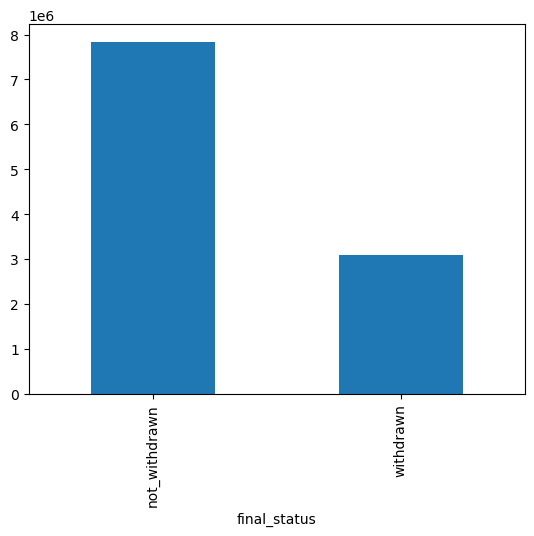

In [42]:
final_df['final_status'] = final_df['final_result'].apply(lambda x: 'not_withdrawn' if x in ['Pass', 'Distinction'] else 'withdrawn' if x in ['Fail', 'Withdrawn'] else x)
final_df['final_status'].value_counts().plot(kind = 'bar')

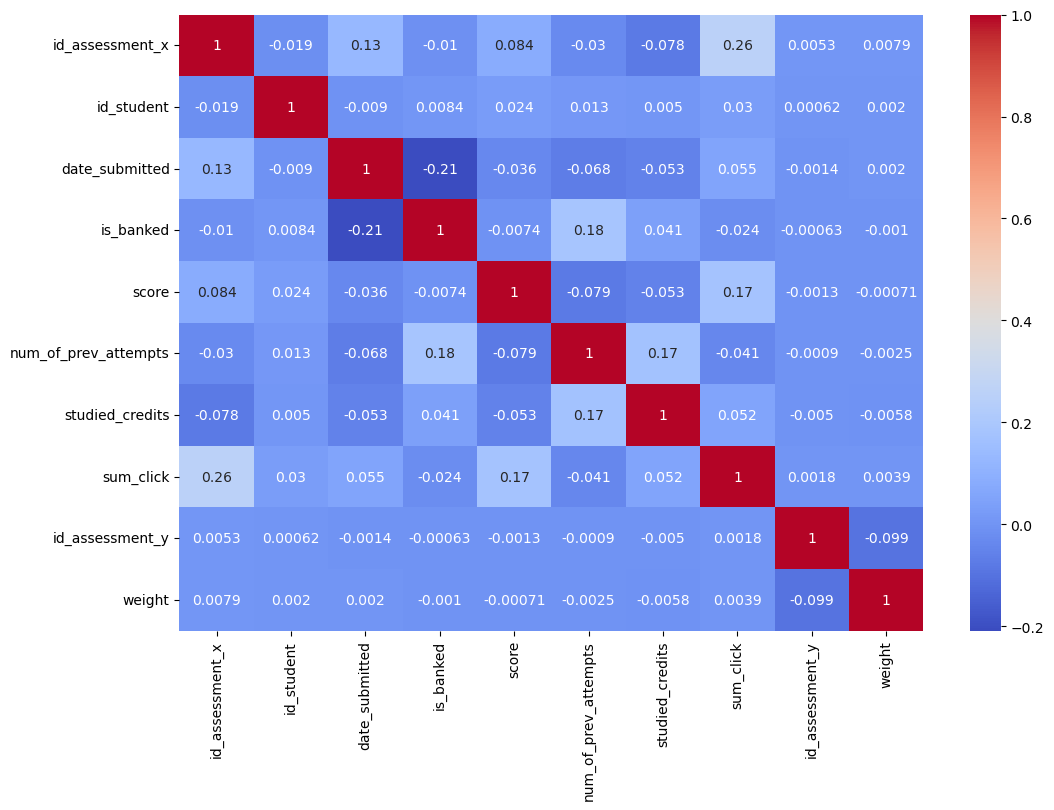

In [43]:
plt.figure(figsize = (12, 8))
numeric_df = final_df.select_dtypes(include=[int, float])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.show()

<Axes: xlabel='final_result', ylabel='sum_click'>

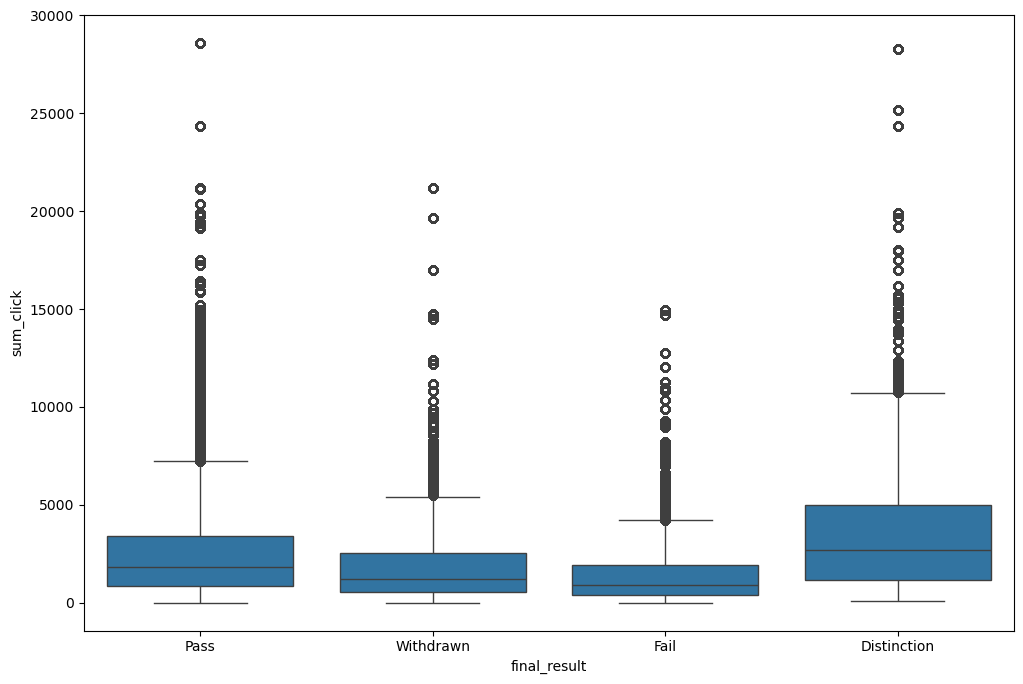

In [44]:
plt.figure(figsize = (12, 8))
sns.boxplot(data=final_df, x= 'final_result', y= 'sum_click')

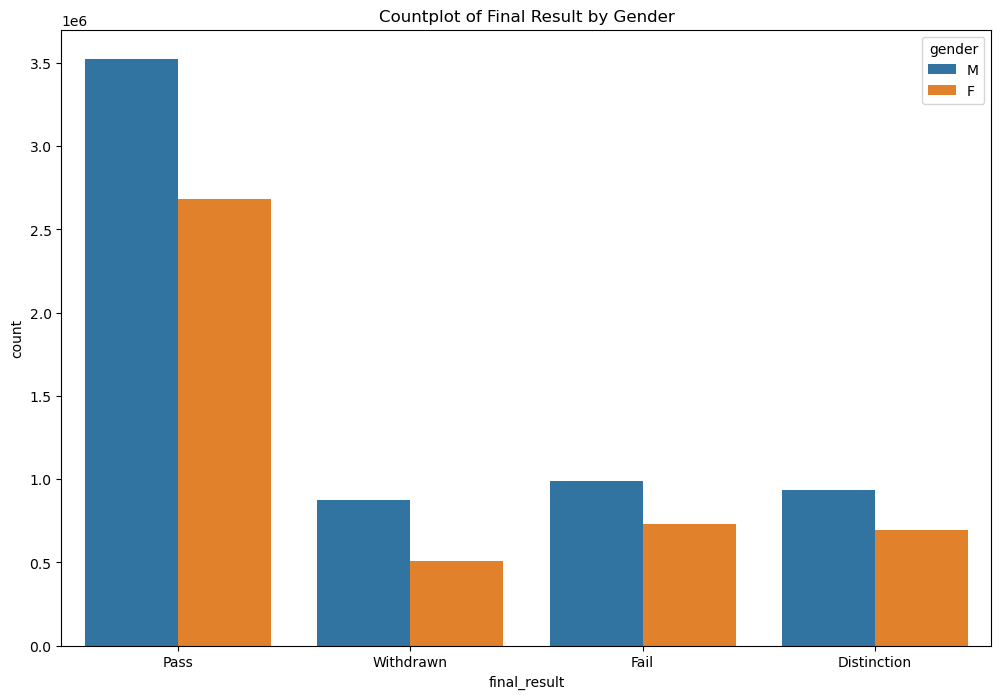

In [45]:
plt.figure(figsize = (12, 8))
sns.countplot( data = final_df, x = 'final_result', hue = 'gender')
plt.title('Countplot of Final Result by Gender')
plt.show()

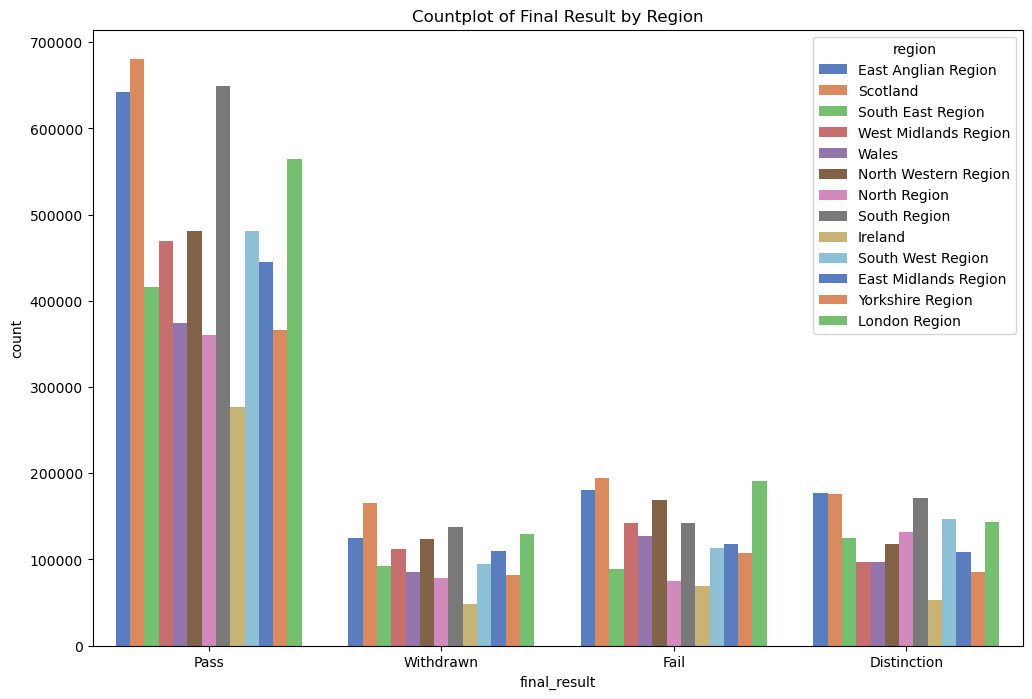

In [46]:
plt.figure(figsize = (12, 8))
sns.countplot( data = final_df, x = 'final_result', hue = 'region', palette='muted')
plt.title('Countplot of Final Result by Region')
plt.show()

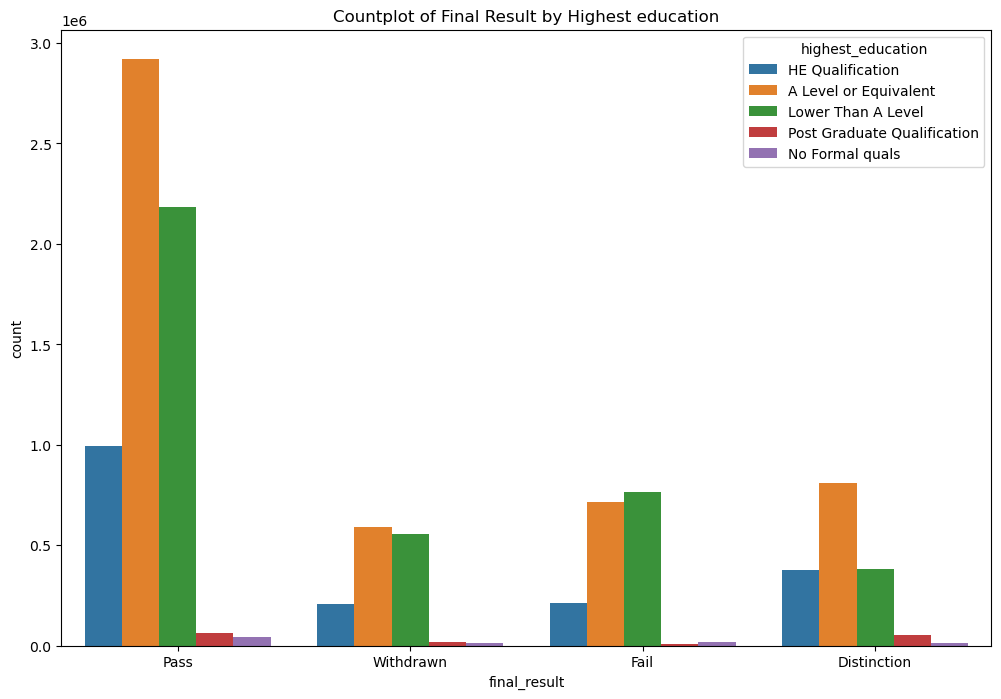

In [47]:
plt.figure(figsize = (12, 8))
sns.countplot( data = final_df, x = 'final_result', hue = 'highest_education')
plt.title('Countplot of Final Result by Highest education')
plt.show()

In [48]:
print(final_df['gender'].value_counts())

gender
M    6319204
F    4616024
Name: count, dtype: int64


In [50]:
contingency_tab = pd.crosstab(final_df['gender'], final_df['final_result'])
chi2, p, dof, expected =  chi2_contingency(contingency_tab)
min_dim = min(contingency_tab.shape) - 1  # Minimum of rows and columns minus 1
cramers_v = np.sqrt(chi2 / (n * min_dim))  # Cramér's V formula
print(f"Cramér's V: {cramers_v:.4f}")
print(f"Chi2 statistic: {chi2}")
print(f"P-value: {p:.4f}")

NameError: name 'n' is not defined

In [51]:
contingency_tab = pd.crosstab(final_df['disability'], final_df['final_result'])
chi2, p, dof, expected =  chi2_contingency(contingency_tab)
min_dim = min(contingency_tab.shape) - 1  # Minimum of rows and columns minus 1
cramers_v = np.sqrt(chi2 / (n * min_dim))  # Cramér's V formula
print(f"Cramér's V: {cramers_v:.4f}")
print(f"Chi2 statistic: {chi2}")
print(f"P-value: {p:.4f}")

NameError: name 'n' is not defined

In [ ]:
contingency_tab = pd.crosstab(final_df['region'], final_df['final_result'])
chi2, p, dof, expected =  chi2_contingency(contingency_tab)
min_dim = min(contingency_tab.shape) - 1  # Minimum of rows and columns minus 1
cramers_v = np.sqrt(chi2 / (n * min_dim))  # Cramér's V formula
print(f"Cramér's V: {cramers_v:.4f}")
print(f"Chi2 statistic: {chi2}")
print(f"P-value: {p:.4f}")

In [ ]:
contingency_tab = pd.crosstab(final_df['highest_education'], final_df['final_result'])
chi2, p, dof, expected =  chi2_contingency(contingency_tab)
min_dim = min(contingency_tab.shape) - 1  # Minimum of rows and columns minus 1
cramers_v = np.sqrt(chi2 / (n * min_dim))  # Cramér's V formula
print(f"Cramér's V: {cramers_v:.4f}")
print(f"Chi2 statistic: {chi2}")
print(f"P-value: {p:.4f}")

In [ ]:
contingency_tab = pd.crosstab(final_df['age_band'], final_df['final_result'])
chi2, p, dof, expected =  chi2_contingency(contingency_tab)
n = contingency_tab.sum().sum()  # Total sample size
min_dim = min(contingency_tab.shape) - 1  # Minimum of rows and columns minus 1
cramers_v = np.sqrt(chi2 / (n * min_dim))  # Cramér's V formula
print(f"Cramér's V: {cramers_v:.4f}")
print(f"Chi2 statistic: {chi2}")
print(f"P-value: {p:.4f}")

In [ ]:
final_df.groupby('final_status')['sum_click'].var()

In [ ]:
sns.histplot(final_df['sum_click'], kde = True, bins = 10) #sum_click is apparently a skewed variable, therefore mannwhitneyu test will be suitable for the test

In [ ]:
withdrawn = final_df[final_df['final_status'] == 'withdrawn']
not_withdrawn = final_df[final_df['final_status'] == 'not_withdrawn']

p_val = mannwhitneyu(withdrawn['sum_click'], not_withdrawn['sum_click'], alternative = 'two-sided')
print(f"P-value: {p}")

In [ ]:
X = final_df.drop(columns = ['final_status','final_result'])
X.isnull().sum()

In [ ]:
Y= final_df['final_status']
Y.isnull().sum()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 1, stratify = Y)

In [ ]:
y_train.value_counts(normalize = True)

In [ ]:
y_test.value_counts(normalize = True)

In [ ]:
cont_cols = X.select_dtypes(include="number").columns
cat_cols = X.select_dtypes(exclude="number").columns


In [ ]:
scaler = StandardScaler()
X_train_cont_scaled = scaler.fit_transform(X_train[cont_cols])
X_test_cont_scaled = scaler.transform(X_test[cont_cols])

In [ ]:
encoder_cat = OneHotEncoder(handle_unknown='ignore')
X_train_cat_encoded = encoder_cat.fit_transform(X_train[cat_cols])
X_test_cat_encoded = encoder_cat.transform(X_test[cat_cols])

In [ ]:
X_train_preprocessed = sparse.hstack((X_train_cont_scaled, X_train_cat_encoded))
X_test_preprocessed = sparse.hstack((X_test_cont_scaled, X_test_cat_encoded))

In [ ]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # Convert 'not_withdrawn' → 0, 'withdrawn' → 1
y_test_encoded = le.transform(y_test)  # Convert to 0 and 1


In [ ]:
under_sampler = RandomUnderSampler(random_state=99)
X_train_us, y_train_us = under_sampler.fit_resample(X_train_preprocessed, y_train_encoded)


In [ ]:
lr_clf = LogisticRegression(max_iter=500)
lr_clf.fit(X_train_us, y_train_us)


In [ ]:
y_pred = lr_clf.predict(X_test_preprocessed)
test_acc = accuracy_score(y_test_encoded, y_pred)
test_balanced_acc = balanced_accuracy_score(y_test_encoded, y_pred)
index = [] 
scores = {
    "Accuracy": [],
    "Balanced accuracy": []
}

# Append the results to scores and df_scores
index.append("Under-sampling Logistic Regression")
scores["Accuracy"].append(test_acc)
scores["Balanced accuracy"].append(test_balanced_acc)
df_scores = pd.DataFrame(scores, index=index)
df_scores

In [ ]:
class_report = classification_report(y_test_encoded, y_pred)
print(f"Classification Report:\n{class_report}")

In [ ]:
cm = confusion_matrix(y_test_encoded, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_display.plot(cmap='Blues', values_format='d')
plt.show()

In [ ]:
cont_cols = X.select_dtypes(include="number").columns
cat_cols = X.select_dtypes(exclude="number").columns


In [ ]:
scaler = StandardScaler()
X_train_cont_scaled = scaler.fit_transform(X_train[cont_cols])
X_test_cont_scaled = scaler.transform(X_test[cont_cols])

In [ ]:
encoder_cat = OneHotEncoder(handle_unknown='ignore')
X_train_cat_encoded = encoder_cat.fit_transform(X_train[cat_cols])
X_test_cat_encoded = encoder_cat.fit_transform(X_test[cat_cols])


In [ ]:
X_train_preprocessed = sparse.hstack((X_train_cont_scaled, X_train_cat_encoded))
X_test_preprocessed = sparse.hstack((X_test_cont_scaled, X_test_cat_encoded))

In [ ]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # Convert 'not_withdrawn' → 0, 'withdrawn' → 1
y_test_encoded = le.transform(y_test)  # Convert to 0 and 1


In [ ]:
os = RandomOverSampler(random_state=42)  # Create an instance
X_train_os, y_train_os = os.fit_resample(X_train_preprocessed, y_train_encoded)
print(X_train_os.shape, y_train_os.shape)  # These should match

In [ ]:
model = xgb.XGBClassifier(n_jobs=-1, random_state=99)
model.fit(X_train_os, y_train_os)


In [ ]:
y_pred = model.predict(X_test_preprocessed)
test_acc = accuracy_score(y_test_encoded, y_pred)
test_balanced_acc = balanced_accuracy_score(y_test_encoded, y_pred)



In [ ]:
index.append("Over-sampling XGBC Classifier")
scores["Accuracy"].append(test_acc)
scores["Balanced accuracy"].append(test_balanced_acc)
df_scores = pd.DataFrame(scores, index=index)
df_scores

In [ ]:
class_report = classification_report(y_test_encoded, y_pred)
print(f"Classification Report:\n{class_report}")

In [ ]:
cm = confusion_matrix(y_test_encoded, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_display.plot(cmap='Blues', values_format='d')
plt.show()

In [ ]:
cont_cols = X.select_dtypes(include="number").columns
cat_cols = X.select_dtypes(exclude="number").columns

In [ ]:
scaler = StandardScaler()
X_train_cont_scaled = scaler.fit_transform(X_train[cont_cols])
X_test_cont_scaled = scaler.transform(X_test[cont_cols])

In [ ]:
encoder_cat = OneHotEncoder(handle_unknown='ignore')
X_train_cat_encoded = encoder_cat.fit_transform(X_train[cat_cols])
X_test_cat_encoded = encoder_cat.fit_transform(X_test[cat_cols])

In [ ]:
X_train_preprocessed = sparse.hstack((X_train_cont_scaled, X_train_cat_encoded))
X_test_preprocessed = sparse.hstack((X_test_cont_scaled, X_test_cat_encoded))

In [ ]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # Convert 'not_withdrawn' → 0, 'withdrawn' → 1
y_test_encoded = le.transform(y_test)  # Convert to 0 and 1


In [ ]:
under_sampler = RandomUnderSampler(random_state=99)
X_train_us, y_train_us = under_sampler.fit_resample(X_train_preprocessed, y_train_encoded)

In [ ]:
model = xgb.XGBClassifier(n_jobs=-1, random_state=99)
model.fit(X_train_us, y_train_us)

In [ ]:
y_pred = model.predict(X_test_preprocessed)
test_acc = accuracy_score(y_test_encoded, y_pred)
test_balanced_acc = balanced_accuracy_score(y_test_encoded, y_pred)

In [ ]:
index.append("Under-sampling XGBC Classifier")
scores["Accuracy"].append(test_acc)
scores["Balanced accuracy"].append(test_balanced_acc)
df_scores = pd.DataFrame(scores, index=index)
df_scores

In [ ]:
class_report = classification_report(y_test_encoded, y_pred)
print(f"Classification Report:\n{class_report}")

In [ ]:
cm = confusion_matrix(y_test_encoded, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_display.plot(cmap='Blues', values_format='d')
plt.show()